###### 2020-11--03 화요일

# 08_앙상블기법_(2)

### 목차

#### 1. 부스팅 : Adaboost

#### 2. 부스팅 : Gradient Boosting

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [18]:
# 모델 임포트
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 앙상블을 위한 분류 학습기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, Binarizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, make_scorer

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import time

## 1. 부스팅 : Adaboost
   - 약한 개별 학습기에 가중치를 부여한 후, 이전 학습기의 결과가 이후 학습기의 결과에 영향을 미치도록 일렬로 배치하고, 이전 학습기의 결과가 이후 학습기의 결과에 영향을 미치는 정도인 가중치를 변경하여 예측정확도를 높이는 방법

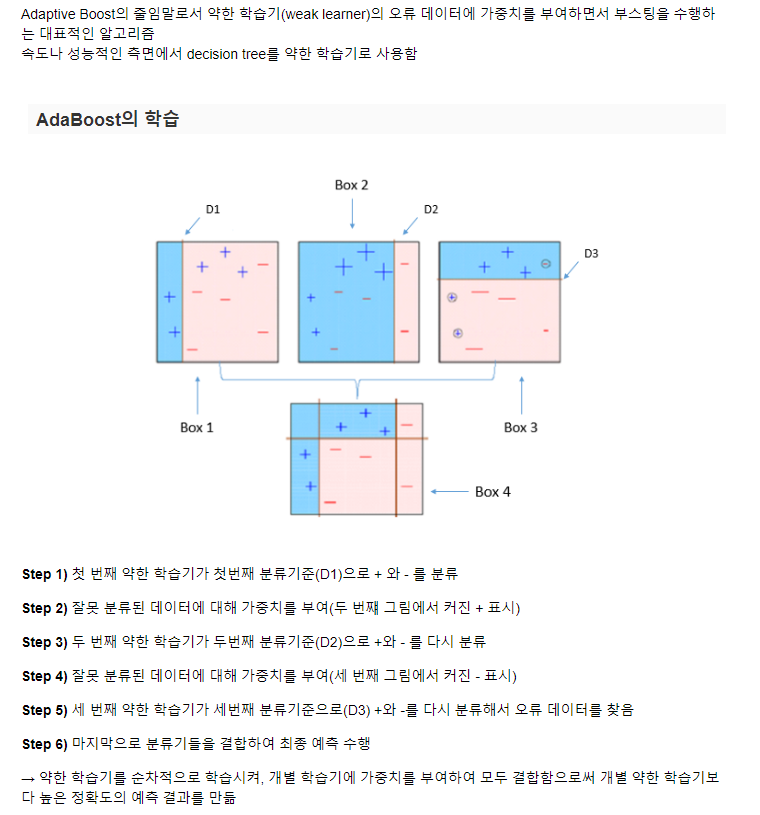

In [3]:
from PIL import Image
Image.open('./실습데이터/adaboost-01.PNG')

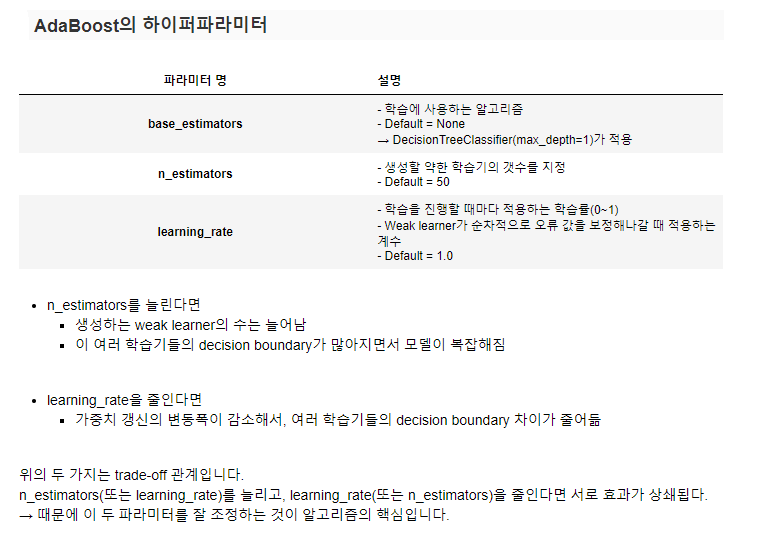

In [4]:
from PIL import Image
Image.open('./실습데이터/adaboost-02.PNG')

##### 부스팅을 실습하기 위해서 `사람 행동인지 데이터 : har_dataset`을 다시 사용하자

In [5]:
# 데이터셋을 구성하는 함수 설정
def har_dataset():
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백문자를 sep으로 할당
    feature_name_df = pd.read_csv('./실습데이터/HAPT Data Set/features.txt', sep='\s+',
                                                     header=None, names=['column_name'])

    # 학습 피처 데이터세트와 테스트 피처 데이터를 데이터프레임으로 로딩
    # 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./실습데이터/HAPT Data Set/Train/X_train.txt', sep='\s+', header=None)
    X_test = pd.read_csv('./실습데이터/HAPT Data Set/Test/X_test.txt', sep='\s+', header=None)
    
    # 학습 레이블과 테스트 레이블 데이터를 데이터 프레임으로 로딩, 컬럼명은 action으로 부여
    y_train = pd.read_csv('./실습데이터/HAPT Data Set/Train/y_train.txt', sep='\s+', names=['action'])
    y_test = pd.read_csv('./실습데이터/HAPT Data Set/Test/y_test.txt', sep='\s+', names=['action'])
    
    
    X_train.columns = feature_name_df.iloc[:, 0].tolist()
    X_test.columns =  feature_name_df.iloc[:, 0].tolist()
    
    # 로드된 학습/테스트용 데이터프레임을 모두 반환
    return X_train, X_test, y_train, y_test

In [6]:
X_train, X_test, y_train, y_test = har_dataset()

In [7]:
# AdaBosst 모델 import
from sklearn.ensemble import AdaBoostClassifier

##### Hold Out Validation 진행해보기

In [8]:
ada_model = AdaBoostClassifier(random_state   = 0,
                               n_estimators   = 70,
                               learning_rate  = 0.5)

ada_model.fit(X_train, y_train)
y_pred = ada_model.predict(X_test)

In [9]:
print('예측 정확도 : ', accuracy_score(y_test, y_pred))

예측 정확도 :  0.571157495256167


##### Train set을 이용한 Grid Search 진행하기
   - 시간이 너무 오래 걸려서 제 컴퓨터에서는 진행 할 수 없었습니다.

In [10]:
# ada_model = AdaBoostClassifier(random_state=0)

# params = {
#     'n_estimators'   : [100, 200, 300],
#     'learning_rate'  : [0.1, 0.3]
# }

# ada_grid = GridSearchCV(ada_model, 
#                         param_grid   = params, 
#                         cv           = 5, 
#                         scoring      = 'accuracy')

# ada_grid.fit(X_train, y_train)

In [11]:
# print('5-CV 결과 최적의 하이퍼파라매터는? :', ada_grid.best_params_)
# print('5-CV 결과 최적의 정확도는?         :', ada_grid.best_scores_)

In [12]:
# best_ada = ada_grid.best_estimators_
# y_pred = best_ada.predict(X_test)
# print('Test set의 정확도는 :', accuracy_score(y_test, y_pred))

## 2. 부스팅 : Gradient Boosting
   - 이것역시 시간이 오래걸려 제 컴퓨터에서는 진행 할 수 없었습니다.

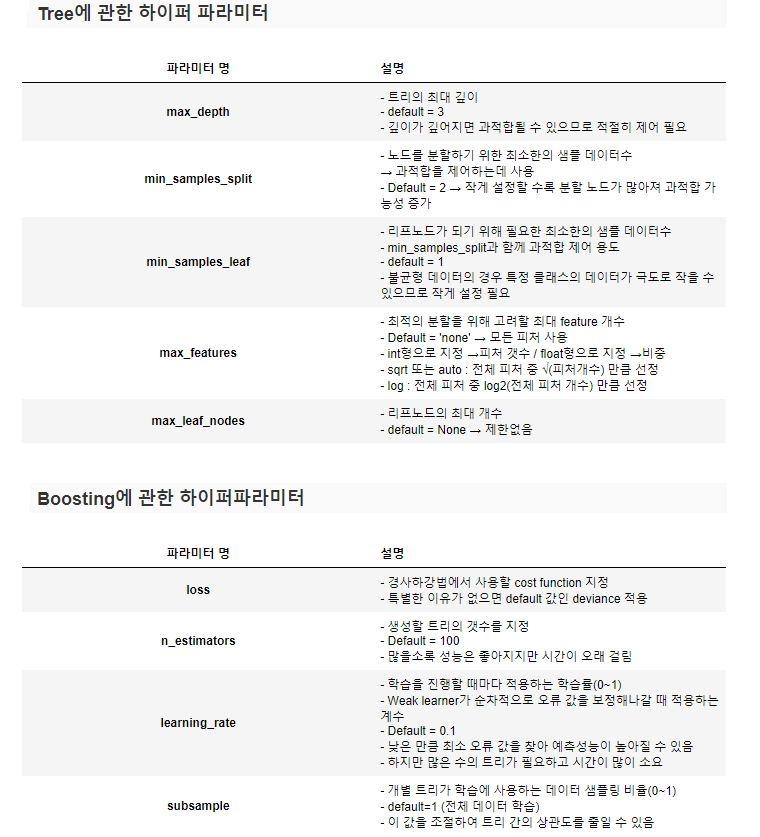

In [13]:
from PIL import Image
Image.open('./실습데이터/GBM-hyper.PNG')

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
# start_time = time.time()

# gbm_moldel = GradientBoostingClassifier(random_state=0)
# gbm_moldel.fit(X_train, y_train)
# y_pred = gbm_moldel.predict(X_test)

# print('수행시간 : ', time.time() - start_time

In [16]:
# print('정확도 :', accuracy_score(y_test, y_pred))

정확도 : 0.571157495256167


###### 하이퍼파라미터 튜닝을 이용한 예측 정확도를 실습해 보자.
   - 제 컴터가 너무 느려요 ㅠㅠ..

In [17]:
# gbm_moldel = GradientBoostingClassifier(random_state=0)

# params = {
#     'n_estimators'  : [100, 200, 300],
#     'learning_rate' : [2, 4, 6]
# }


# gbc_gscv_model = GridSearchCV(gbm_model, param_grid=params, cv=5)
# gbc_gscv_model.fit(X_train, y_train)

In [ ]:
# print('5-CV 결과 최적의 하이퍼파라매터는? :', grid_gbm.best_params_)
# print('5-CV 결과 최적의 정확도는?         :', grid_gbm.best_scores_)

In [ ]:
# best_gbm = gbc_gscv_model.best_estimator_
# y_pred = best_gbm.predict(X_test)
# print('Test set의 정확도는 :', accuracy_score(y_test, y_pred))

In [19]:
def classifier_eval(y_test, y_pred):
    print('오차행렬 :\n', confusion_matrix(y_test, y_pred))
    print('정확도   :', accuracy_score(y_test, y_pred))
    print('정밀도   :', precision_score(y_test, y_pred))
    print('재현율   :', recall_score(y_test, y_pred))
    print('F1       :', f1_score(y_test, y_pred))
    print('AUC      :', roc_auc_score(y_test, y_pred))

In [ ]:
feature_importance = best_gbm.feature_importances_
top20_feature = np.Series(feature_importance, index=X_train.columns).sort_values(ascending=False)[0:20]

sns.barplot(x=top20_feature, y=top20_feature.index)